In [1]:
import pandas as pd
import glob
import os

import collections
import tqdm
import os
import sys

import logging
import requests
from itertools import chain

import joblib
import json
from datetime import datetime
# import spacy

# from nltk.corpus import stopwords

logger = logging.getLogger(__name__)

import numpy as np
import pandas as pd
# import string

# punc = string.punctuation

# stop_words = set(stopwords.words('english'))

In [2]:
import transformers
transformers.__version__

'4.30.2'

In [3]:
# import transformers
# print(transformers.version)
# !pip install datasets==1.2.1
# !pip install huggingface_hub==0.5.0
# !pip uninstall -y huggingface_hub
import datasets

In [4]:
# all_files = glob.glob(os.path.join('/home/contify/Desktop/Jupyter Notebook/Bert Topic Traning/topics_data_2_year', "*.csv"))

df = df = pd.read_excel('/home/asim/Downloads/Business_Events_Old_Data.xlsx')

In [5]:
df = df.fillna(' ')

In [6]:
# df['s_tags'] = df.s_tags.apply(lambda x: [int(j.strip()) for j in x[1:-1].split(',') if j != ''])


In [7]:
# for x  in df['s_tags']:
#     print([int(j.strip()) for j in x[1:-1].split(',') if j != ''])

In [8]:
# df = df.fillna(' ')

In [9]:
df

,Text,s_tags
0,Sumo Logic Provides Cloud-Native Log Analytics...,[35]
1,Mitsubishi Electric Announces Changes in Divis...,[7]
2,BTG Pactual acquires FIS Privatbank S.A. The a...,[8]
3,Ericsson and Telefónica agree to collaborate o...,[13]
4,Warsaw without coal O wprowadzenie uchwały ant...,[13]
...,...,...
25296,Xiaomi files patent for technology supporting ...,"[48, 56]"
25297,EC-Council Announces $3.5 Million CCT Scholars...,"[48, 49]"
25298,Smarttech247 partners with SentinelOne® to pro...,"[48, 49]"
25299,West Pharmaceutical Services Opens New R&D Lab...,"[2, 13]"


In [10]:
import ast
df['s_tags'] = df['s_tags'].apply(ast.literal_eval)

In [11]:
tag_list = df['s_tags'].to_list()
all_tag_list = list(chain.from_iterable(tag_list))
# all_tag_list = [i.strip() for i in all_tag_list]
tag_count = collections.Counter(all_tag_list)
del all_tag_list, tag_list

In [12]:
del tag_count['']

In [13]:
tag_count = {int(i):j for i,j in tag_count.items()}

In [14]:
# df[['title', 'lead', 'body']]

In [15]:
df

,Text,s_tags
0,Sumo Logic Provides Cloud-Native Log Analytics...,[35]
1,Mitsubishi Electric Announces Changes in Divis...,[7]
2,BTG Pactual acquires FIS Privatbank S.A. The a...,[8]
3,Ericsson and Telefónica agree to collaborate o...,[13]
4,Warsaw without coal O wprowadzenie uchwały ant...,[13]
...,...,...
25296,Xiaomi files patent for technology supporting ...,"[48, 56]"
25297,EC-Council Announces $3.5 Million CCT Scholars...,"[48, 49]"
25298,Smarttech247 partners with SentinelOne® to pro...,"[48, 49]"
25299,West Pharmaceutical Services Opens New R&D Lab...,"[2, 13]"


In [16]:
# df[df[['title', 'lead', 'body']].apply(lambda x: len(x[0].split())<3 or len(x[1].split())<3 or len(x[2].split())<3 , axis=1)].shape

In [17]:
import re
def split_it(x):
    return re.sub('<[^<]+?>', '', x)

In [18]:
df['Text'] = df['Text'].apply(lambda x: split_it(x))
# df['lead'] = df['lead'].apply(lambda x: split_it(x))

In [19]:
# id_name_map ={98485: 'Strategy',
#              98495: 'Business Closure',
#              98496: 'Business Expansion',
#              98498: 'Business Reorganisation/ Restructuring',
#              98499: 'Demerger/ Spin Off',
#              98500: 'Leadership Changes',
#              98501: 'M&A Activities',
#              98502: 'Asset Buy/ Divestiture',
#              98503: 'Funding Activities',
#              98504: 'Capital Investment',
#              98505: 'Joint Ventures',
#              98506: 'Partnerships and Alliances',
#              98559: 'R&D Labs/ Innovation Centers',
#              98486: 'Marketing',
#              98540: 'Marketing & Promotional Activities',
#              98541: 'Awards & Recognitions',
#              98542: 'Rebranding',
#              98487: 'HR & People',
#              98543: 'Hirings (Non-Leadership)',
#              98544: 'Layoff',
#              98545: 'Employee Related Initiative',
#              98488: 'Operations',
#              98509: 'Operational Performance',
#              98510: 'Cost Cutting',
#              98511: 'Supply Chain/ Procurement',
#              98512: 'Operational Challenges',
#              98513: 'Facility/ Office Closure',
#              98515: 'Digital Transformation Initiative',
#              98489: 'Sales',
#              98533: 'Tender/ Contract Updates',
#              98536: 'Pricing Changes',
#              98490: 'Products/ Services',
#              98491: 'Product Discontinuation',
#              98529: 'Product Issues/ Recall',
#              98530: 'Analyst Recognition',
#              98531: 'Product/ Service Enhancement',
#              98532: 'New Product/ Service',
#              98518: 'Financial',
#              98519: 'Accounting Fraud',
#              98520: 'Activist Shareholder',
#              98521: 'Bankruptcy',
#              98523: 'Credit Rating Update',
#              98524: 'Financial Performance',
#              98525: 'Insider Trading',
#              98526: 'IPO',
#              98527: 'Share Repurchase',
#              98546: 'Risk & Regulatory',
#              98547: 'Cybersecurity Incidents',
#              98548: 'Data Breach',
#              98549: 'Negative News',
#              98550: 'Lawsuit/ Legal Issue',
#              98551: 'Regulation & Policies',
#              98552: 'Regulatory Action/ Probe',
#              98553: 'Patent Dispute',
#              98555: 'Patent Filing'}

In [20]:
id_name_map = {2: 'Strategy',
 3: 'Business Closure',
 4: 'Business Expansion',
 5: 'Business Reorganisation/ Restructuring',
 6: 'Demerger/ Spin Off',
 7: 'Leadership Changes',
 8: 'M&A Activities',
 9: 'Asset Buy/ Divestiture',
 10: 'Funding Activities',
 11: 'Capital Investment',
 12: 'Joint Ventures',
 14: 'Partnerships and Alliances',
 13: 'R&D Labs/ Innovation Centers',
 40: 'Marketing',
 41: 'Marketing & Promotional Activities',
 42: 'Awards & Recognitions',
 43: 'Rebranding',
 44: 'HR & People',
 45: 'Hirings (Non-Leadership)',
 46: 'Layoff',
 47: 'Employee Related Initiative',
 15: 'Operations',
 16: 'Operational Performance',
 17: 'Cost Cutting',
 18: 'Supply Chain/ Procurement',
 19: 'Operational Challenges',
 20: 'Facility/ Office Closure',
 21: 'Digital Transformation Initiative',
 37: 'Sales',
 38: 'Tender/ Contract Updates',
 39: 'Pricing Changes',
 36: 'Product Discontinuation',
 31: 'Products/ Services',
 32: 'Product Issues/ Recall',
 33: 'Analyst Recognition',
 34: 'Product/ Service Enhancement',
 35: 'New Product/ Service',
 22: 'Financial',
 23: 'Accounting Fraud',
 24: 'Activist Shareholder',
 25: 'Bankruptcy',
 26: 'Credit Rating Update',
 27: 'Financial Performance',
 28: 'Insider Trading',
 29: 'IPO',
 30: 'Share Repurchase',
 48: 'Risk & Regulatory',
 49: 'Cybersecurity Incidents',
 50: 'Data Breach',
 51: 'Negative News',
 52: 'Lawsuit/ Legal Issue',
 53: 'Regulation & Policies',
 54: 'Regulatory Action/ Probe',
 55: 'Patent Dispute',
 56: 'Patent Filing'}

In [21]:
{id_name_map[t_id]:tag_count[t_id] for t_id in tag_count}

{'New Product/ Service': 693,
 'Leadership Changes': 1399,
 'M&A Activities': 707,
 'R&D Labs/ Innovation Centers': 836,
 'Awards & Recognitions': 1723,
 'Employee Related Initiative': 398,
 'Capital Investment': 467,
 'Partnerships and Alliances': 2539,
 'Business Expansion': 830,
 'Pricing Changes': 438,
 'Regulation & Policies': 421,
 'Financial Performance': 1253,
 'Marketing & Promotional Activities': 683,
 'Product/ Service Enhancement': 1765,
 'Funding Activities': 693,
 'IPO': 328,
 'Operational Performance': 533,
 'Lawsuit/ Legal Issue': 595,
 'Insider Trading': 300,
 'Accounting Fraud': 389,
 'Layoff': 363,
 'Cybersecurity Incidents': 535,
 'Asset Buy/ Divestiture': 548,
 'Digital Transformation Initiative': 408,
 'Analyst Recognition': 465,
 'Hirings (Non-Leadership)': 408,
 'Regulatory Action/ Probe': 375,
 'Business Reorganisation/ Restructuring': 365,
 'Demerger/ Spin Off': 322,
 'Joint Ventures': 407,
 'Patent Filing': 330,
 'Rebranding': 349,
 'Credit Rating Update': 37

In [22]:
id_name_map

{2: 'Strategy',
 3: 'Business Closure',
 4: 'Business Expansion',
 5: 'Business Reorganisation/ Restructuring',
 6: 'Demerger/ Spin Off',
 7: 'Leadership Changes',
 8: 'M&A Activities',
 9: 'Asset Buy/ Divestiture',
 10: 'Funding Activities',
 11: 'Capital Investment',
 12: 'Joint Ventures',
 14: 'Partnerships and Alliances',
 13: 'R&D Labs/ Innovation Centers',
 40: 'Marketing',
 41: 'Marketing & Promotional Activities',
 42: 'Awards & Recognitions',
 43: 'Rebranding',
 44: 'HR & People',
 45: 'Hirings (Non-Leadership)',
 46: 'Layoff',
 47: 'Employee Related Initiative',
 15: 'Operations',
 16: 'Operational Performance',
 17: 'Cost Cutting',
 18: 'Supply Chain/ Procurement',
 19: 'Operational Challenges',
 20: 'Facility/ Office Closure',
 21: 'Digital Transformation Initiative',
 37: 'Sales',
 38: 'Tender/ Contract Updates',
 39: 'Pricing Changes',
 36: 'Product Discontinuation',
 31: 'Products/ Services',
 32: 'Product Issues/ Recall',
 33: 'Analyst Recognition',
 34: 'Product/ Servi

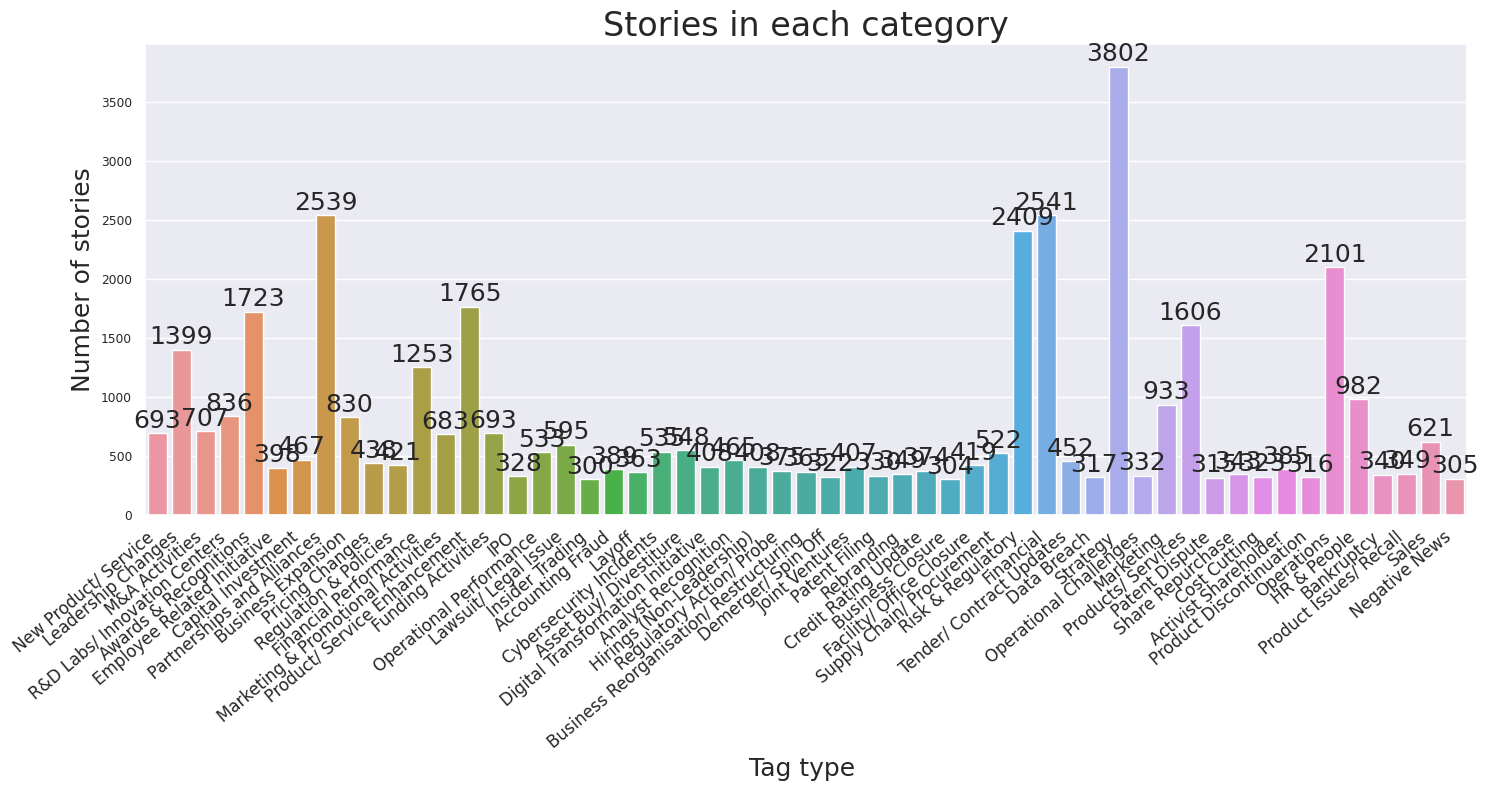

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
categories = list(tag_count.keys())
label_count = [tag_count[c] for c in categories]
categories = [id_name_map[c] for c in categories]
sns.set(font_scale = 0.8)
plt.figure(figsize=(15,8))
ax= sns.barplot(x=categories, y=label_count)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)

plt.title("Stories in each category", fontsize=24)
plt.ylabel('Number of stories', fontsize=18)
plt.xlabel('Tag type ', fontsize=18)
# fig = plt.figure()
# fig.autofmt_xdate()
#adding the text labels
rects = ax.patches
for rect, label in zip(rects, label_count):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, int(height), ha='center', va='bottom', fontsize=18)
plt.tight_layout()
plt.show()

In [24]:
df_all = df

In [25]:
df_all = df_all[~df_all['s_tags'].apply(lambda x: len(x)<1)]

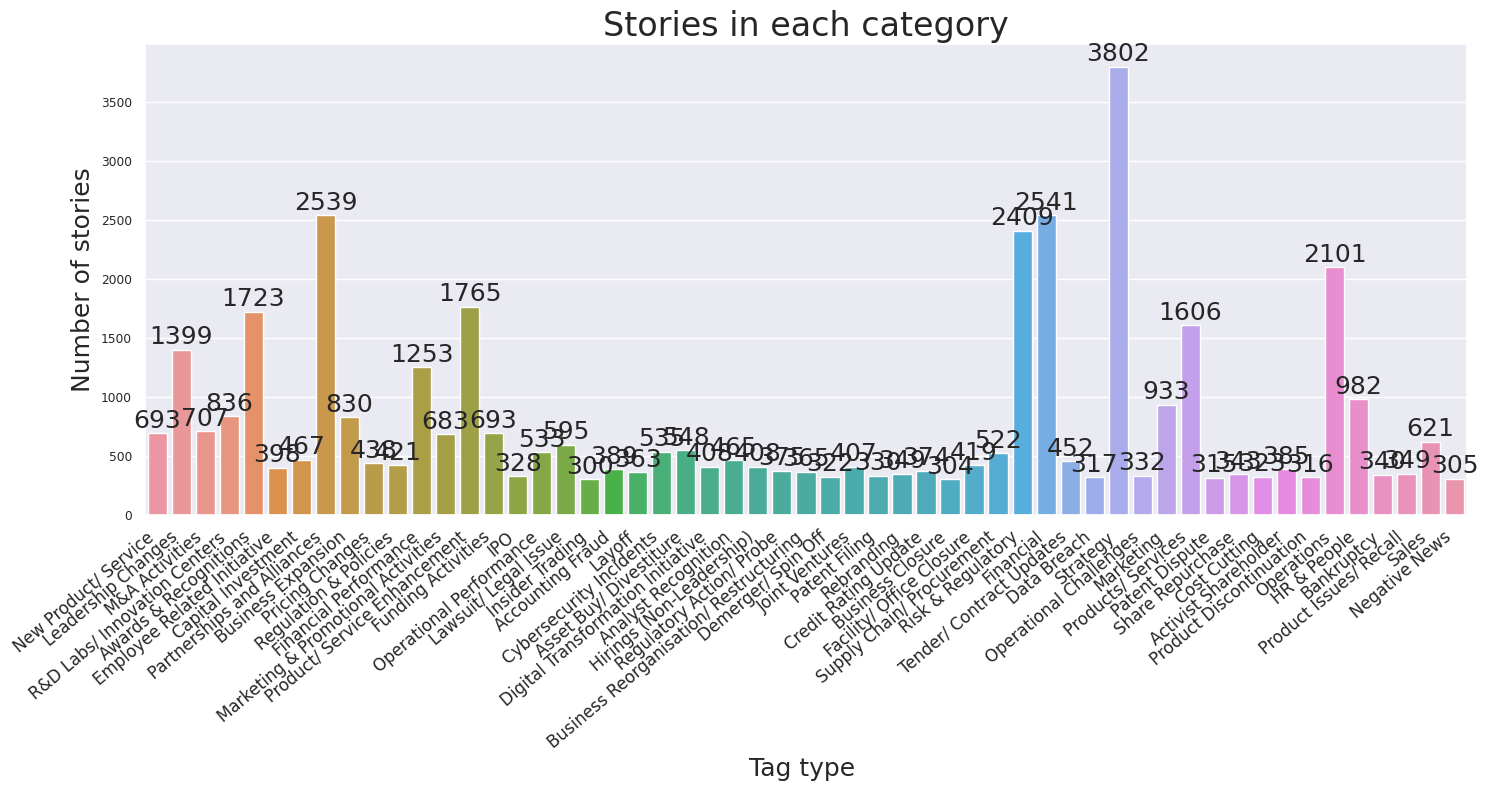

In [26]:
tag_list = df_all['s_tags'].to_list()
all_tag_list = list(chain.from_iterable(tag_list))
# all_tag_list = [int(i.strip()) for i in all_tag_list if i]
tag_count_all = collections.Counter(all_tag_list)
# tag_count_all = tag_count = {k:v for k,v in tag_count_all.items() if k not in exclude_parent}
# del all_tag_list, tag_list
# print({id_name_map[t_id]:tag_count_all[t_id] for t_id in tag_count_all})
categories = list(tag_count_all.keys())
label_count = [tag_count_all[c] for c in categories]
categories = [id_name_map[c] for c in categories]
sns.set(font_scale = 0.8)
plt.figure(figsize=(15,8))
ax= sns.barplot(x=categories, y=label_count)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)

plt.title("Stories in each category", fontsize=24)
plt.ylabel('Number of stories', fontsize=18)
plt.xlabel('Tag type ', fontsize=18)
# fig = plt.figure()
# fig.autofmt_xdate()
#adding the text labels
rects = ax.patches
for rect, label in zip(rects, label_count):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, int(height), ha='center', va='bottom', fontsize=18)
plt.tight_layout()
plt.show()

In [27]:
df_small = df_all[df_all['s_tags'].apply(lambda x: len(x) > 0)]

In [28]:
print(df_small.shape)
print(df_all.shape)

(25300, 2)
(25300, 2)


In [29]:
def show_count(df_count, field='s_tags'):
    tag_list = df_count[field].to_list()
    all_tag_list = list(chain.from_iterable(tag_list))
    tag_count_all = collections.Counter(all_tag_list)
    del all_tag_list, tag_list
    # print({id_name_map[t_id]:tag_count_all[t_id] for t_id in tag_count_all})
    categories = list(tag_count_all.keys())
    label_count = [tag_count_all[c] for c in categories]
    categories = [id_name_map[c] for c in categories]
    sns.set(font_scale = 0.8)
    plt.figure(figsize=(15,8))
    ax= sns.barplot(categories, label_count)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)

    plt.title("Stories in each category", fontsize=24)
    plt.ylabel('Number of stories', fontsize=18)
    plt.xlabel('Tag type ', fontsize=18)
    # fig = plt.figure()
    # fig.autofmt_xdate()
    #adding the text labels
    rects = ax.patches
    for rect, label in zip(rects, label_count):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height + 5, int(height), ha='center', va='bottom', fontsize=18)
    plt.tight_layout()
    plt.show()

In [30]:
tag_list = df_small['s_tags'].to_list()
all_tag_list = list(chain.from_iterable(tag_list))
tag_count = collections.Counter(all_tag_list)
del all_tag_list, tag_list

In [31]:
tag_count.items()

dict_items([(35, 693), (7, 1399), (8, 707), (13, 836), (42, 1723), (47, 398), (11, 467), (14, 2539), (4, 830), (39, 438), (53, 421), (27, 1253), (41, 683), (34, 1765), (10, 693), (29, 328), (16, 533), (52, 595), (28, 300), (23, 389), (46, 363), (49, 535), (9, 548), (21, 408), (33, 465), (45, 408), (54, 375), (5, 365), (6, 322), (12, 407), (56, 330), (43, 349), (26, 374), (3, 304), (20, 419), (18, 522), (48, 2409), (22, 2541), (38, 452), (50, 317), (2, 3802), (19, 332), (40, 933), (31, 1606), (55, 315), (30, 343), (17, 323), (24, 385), (36, 316), (15, 2101), (44, 982), (25, 340), (32, 349), (37, 621), (51, 305)])

In [32]:
tags_to_delete = [23,9,26,20,5,45,21,19,16,36,53,54,38,41,34,24,25,17,18,52,6,28,43,46]

tag_count = {key: value for key, value in tag_count.items() if key not in tags_to_delete}

In [33]:
tag_count.items()

dict_items([(35, 693), (7, 1399), (8, 707), (13, 836), (42, 1723), (47, 398), (11, 467), (14, 2539), (4, 830), (39, 438), (27, 1253), (10, 693), (29, 328), (49, 535), (33, 465), (12, 407), (56, 330), (3, 304), (48, 2409), (22, 2541), (50, 317), (2, 3802), (40, 933), (31, 1606), (55, 315), (30, 343), (15, 2101), (44, 982), (32, 349), (37, 621), (51, 305)])

In [34]:
exclude_tags = [t for t, v in tag_count.items() if v < 250]

In [35]:
[tag_count.pop(ex_t) for ex_t in exclude_tags]

[]

In [36]:
df_small['s_tags'] = df_small['s_tags'].apply(lambda x: list(set(x).difference(exclude_tags)))

In [37]:

# df_small['text'] = (df_small['title']+". ")*3  + (df_small['lead']+" ") *2 + df_small['body']

In [38]:
df_small['Text'] = df_small['Text'].fillna(' ')

In [39]:
import re
def preprocess(text):
    text = re.sub('^\[(.*?)\]', '', text)   
    return text

In [40]:
u_tags = list(tag_count.keys())
df_final = df_small[~df_small['s_tags'].apply(lambda x: len(x) < 1)]

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train_tags, Y_test_tags = train_test_split(df_final, df_final['s_tags'], random_state=42,
                                                              test_size=0.20)
tag_test_count = collections.Counter(list(chain.from_iterable(Y_test_tags)))
tag_train_count = collections.Counter(list(chain.from_iterable(Y_train_tags)))

In [42]:
labels_to_train = list(tag_count.keys())

In [43]:
list(tag_count.keys())

[35,
 7,
 8,
 13,
 42,
 47,
 11,
 14,
 4,
 39,
 27,
 10,
 29,
 49,
 33,
 12,
 56,
 3,
 48,
 22,
 50,
 2,
 40,
 31,
 55,
 30,
 15,
 44,
 32,
 37,
 51]

In [44]:
X_train_list = []
for index, row in X_train.iterrows():
  l_list = []
  # print(row["text"])
  l_list.append(row["Text"])
  for j in labels_to_train:
    if j in row["s_tags"]:
      l_list.append(True)
    else:
      l_list.append(False)
  # print(l_list)
  X_train_list.append(l_list)

In [45]:
X_test_list = []
for index, row in X_test.iterrows():
  l_list = []
  # print(row["text"])
  l_list.append(row["Text"])
  for j in labels_to_train:
    if j in row["s_tags"]:
      l_list.append(True)
    else:
      l_list.append(False)
  # print(l_list)
  X_test_list.append(l_list)

In [46]:
col =["text"] + labels_to_train

In [47]:
X_test_df = pd.DataFrame(X_test_list, columns=col)
X_train_df = pd.DataFrame(X_train_list, columns=col)

In [48]:
X_train_df

,text,35,7,8,13,42,47,11,14,4,...,2,40,31,55,30,15,44,32,37,51
0,Kaman announces discontinuation of K-MAX helic...,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,Samsung Electronics To Host AI Forum 2023 High...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Shell and Microsoft collaborate on digital ski...,False,False,False,False,False,False,False,True,False,...,True,False,False,False,False,False,False,False,False,False
3,"S&P Drops WeWork’s Credit Rating, Again What’s...",False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Tegna Buyout Shelved by FCC Order Sending Deal...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20235,MOG Unveils its New Brand Identity & Positioni...,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
20236,Victor DeStefano Named President of Empire Blu...,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20237,U.S. Chamber of Commerce Announces America’s T...,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20238,GM Files Patent For Self-Cleaning LED Displays...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [49]:
# !pip install datasets
import datasets
import pandas as pd

train_dataset = datasets.Dataset.from_pandas(X_train_df)
test_dataset = datasets.Dataset.from_pandas(X_test_df)
my_dataset_dict = datasets.DatasetDict({"train":train_dataset,"test":test_dataset})

/home/asim/.pyenv/versions/3.7.17/envs/aws/lib/python3.7/site-packages/datasets/table.py:761: UserWarning: The DataFrame has column names of mixed type. They will be converted to strings and not roundtrip correctly.
  return cls(pa.Table.from_pandas(*args, **kwargs))


In [50]:
import datasets

In [51]:
labels = [label for label in my_dataset_dict['train'].features.keys() if label not in ['ID', 'text']]
id2label = {idx:label for idx, label in enumerate(labels)}
label2id = {label:idx for idx, label in enumerate(labels)}
labels

['35',
 '7',
 '8',
 '13',
 '42',
 '47',
 '11',
 '14',
 '4',
 '39',
 '27',
 '10',
 '29',
 '49',
 '33',
 '12',
 '56',
 '3',
 '48',
 '22',
 '50',
 '2',
 '40',
 '31',
 '55',
 '30',
 '15',
 '44',
 '32',
 '37',
 '51']

In [52]:
from transformers import AutoTokenizer
import numpy as np

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

def preprocess_data(examples):
  # take a batch of texts
  text = examples["text"]
  # encode them
  encoding = tokenizer(text, padding="max_length", truncation=True, max_length=128)
  # add labels
  labels_batch = {k: examples[k] for k in examples.keys() if k in labels}
  # create numpy array of shape (batch_size, num_labels)
  labels_matrix = np.zeros((len(text), len(labels)))
  # fill numpy array
  for idx, label in enumerate(labels):
    labels_matrix[:, idx] = labels_batch[label]

  encoding["labels"] = labels_matrix.tolist()
  
  return encoding

In [53]:
# !pip uninstall dill0==3.1.1

In [54]:
# !pip install dill==0.3.1.1

In [55]:
encoded_dataset = my_dataset_dict.map(preprocess_data, batched=True, remove_columns=my_dataset_dict['train'].column_names)

Map:   0%|          | 0/20240 [00:00<?, ? examples/s]

Map:   0%|          | 0/5060 [00:00<?, ? examples/s]

In [56]:
# !pip install protobuf==3.20

In [57]:
example = encoded_dataset['train'][0]
print(example.keys())

dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'labels'])


In [58]:
tokenizer.decode(example['input_ids'])

'[CLS] kaman announces discontinuation of k - max helicopter 2022 giving guide this special edition informs and connects businesses with nonprofit organizations that are aligned with what they care about. each nonprofit profile provides a crisp snapshot of the organization ’ s mission, goals, area of service, giving and volunteer opportunities and board leadership. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]'

In [59]:

example['labels']

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [60]:
[id2label[idx] for idx, label in enumerate(example['labels']) if label == 1.0]

['31']

In [61]:
encoded_dataset.set_format("torch")

In [62]:
from transformers import AutoModelForSequenceClassification
# from transformers import RobertaTokenizer

model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", 
                                                           problem_type="multi_label_classification", 
                                                           num_labels=len(labels),
                                                           id2label=id2label,
                                                           label2id=label2id)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly i

In [63]:
batch_size = 2
metric_name = "f1"

In [64]:
from transformers import TrainingArguments, Trainer


args = TrainingArguments(
    f"be-10-dec-sem_eval-english",
    evaluation_strategy = "epoch",
    save_strategy = "epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=10,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model=metric_name,
    #push_to_hub=True,
)

In [65]:
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
from transformers import EvalPrediction
import torch
    
# source: https://jesusleal.io/2021/04/21/Longformer-multilabel-classification/
def multi_label_metrics(predictions, labels, threshold=0.5):
    # first, apply sigmoid on predictions which are of shape (batch_size, num_labels)
    sigmoid = torch.nn.Sigmoid()
    probs = sigmoid(torch.Tensor(predictions))
    # next, use threshold to turn them into integer predictions
    y_pred = np.zeros(probs.shape)
    y_pred[np.where(probs >= threshold)] = 1
    # finally, compute metrics
    y_true = labels
    f1_micro_average = f1_score(y_true=y_true, y_pred=y_pred, average='micro')
    roc_auc = roc_auc_score(y_true, y_pred, average = 'micro')
    accuracy = accuracy_score(y_true, y_pred)
    # return as dictionary
    metrics = {'f1': f1_micro_average,
               'roc_auc': roc_auc,
               'accuracy': accuracy}
    return metrics

def compute_metrics(p: EvalPrediction):
    preds = p.predictions[0] if isinstance(p.predictions, 
            tuple) else p.predictions
    result = multi_label_metrics(
        predictions=preds, 
        labels=p.label_ids)
    return result

In [66]:
encoded_dataset['train'][0]['labels'].type()

'torch.FloatTensor'

In [67]:
encoded_dataset['train']['input_ids'][0]

tensor([  101, 27829,  2319, 17472, 12532, 16778, 11231,  3370,  1997,  1047,
         1011,  4098,  7739, 16798,  2475,  3228,  5009,  2023,  2569,  3179,
        15670,  1998,  8539,  5661,  2007, 14495,  4411,  2008,  2024, 13115,
         2007,  2054,  2027,  2729,  2055,  1012,  2169, 14495,  6337,  3640,
         1037, 15594, 20057, 12326,  1997,  1996,  3029,  1521,  1055,  3260,
         1010,  3289,  1010,  2181,  1997,  2326,  1010,  3228,  1998,  6951,
         6695,  1998,  2604,  4105,  1012,   102,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0])

In [68]:
#forward pass
outputs = model(input_ids=encoded_dataset['train']['input_ids'][0].unsqueeze(0), labels=encoded_dataset['train'][0]['labels'].unsqueeze(0))
outputs

SequenceClassifierOutput(loss=tensor(0.6605, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>), logits=tensor([[-0.3754,  0.1631, -0.0346, -0.4847,  0.2545, -0.4193,  0.2105,  0.1688,
          0.3108, -0.2383, -0.5488, -0.0900, -0.1311, -0.3403,  0.4446,  0.0268,
          0.1760, -0.0253, -0.1483, -0.1222, -0.2227, -0.0910, -0.0760,  0.1971,
          0.0961,  0.6410, -0.3166, -0.7640, -0.0934,  0.1981, -0.8836]],
       grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [69]:
trainer = Trainer(
    model,
    args,
    train_dataset=encoded_dataset["train"],
    eval_dataset=encoded_dataset["test"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

In [70]:
trainer.train()

/home/asim/.pyenv/versions/3.7.17/envs/aws/lib/python3.7/site-packages/transformers/optimization.py:415: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,F1,Roc Auc,Accuracy
1,0.035100,0.034555,0.863919,0.924016,0.752569
2,0.025000,0.028641,0.886332,0.930479,0.797036
3,0.018600,0.027908,0.897784,0.938428,0.820553
4,0.012000,0.029101,0.904750,0.946565,0.829051
5,0.007800,0.032875,0.902258,0.949674,0.824901
6,0.004800,0.034566,0.906235,0.945557,0.833794
7,0.002000,0.035155,0.907867,0.950159,0.837549
8,0.001500,0.036689,0.912150,0.951503,0.842292
9,0.001300,0.037655,0.908475,0.952566,0.836166
10,0.000400,0.037890,0.912549,0.955284,0.842688


TrainOutput(global_step=101200, training_loss=0.013642083149800895, metrics={'train_runtime': 5764.4518, 'train_samples_per_second': 35.112, 'train_steps_per_second': 17.556, 'total_flos': 1.33168859400192e+16, 'train_loss': 0.013642083149800895, 'epoch': 10.0})

In [71]:
trainer.evaluate()

{'eval_loss': 0.03788960725069046,
 'eval_f1': 0.9125493672926573,
 'eval_roc_auc': 0.9552836137177629,
 'eval_accuracy': 0.8426877470355731,
 'eval_runtime': 26.2948,
 'eval_samples_per_second': 192.433,
 'eval_steps_per_second': 96.217,
 'epoch': 10.0}

In [72]:
trainer.save_model()

In [73]:
df["body"][1]

KeyError: 'body'

In [ ]:
aa = re.sub('<[^<]+?>', '', df["body"][1])

In [ ]:
aa

In [ ]:
import pandas as pd

# Specify the path to your Excel file
excel_file_path = 'Business Events _ Story Review.xlsx'

# Read all sheets into a dictionary of DataFrames
sheets_dict = pd.read_excel(excel_file_path, sheet_name=None)

# Define the columns to concatenate based on
columns_to_concatenate = ['Title', 'Intro', 'Business Events', 'URL']

# Initialize an empty DataFrame to store the concatenated data
concatenated_df = pd.DataFrame(columns=columns_to_concatenate)

# Concatenate DataFrames based on the specified columns
for sheet_name, sheet_df in sheets_dict.items():
    if all(column in sheet_df.columns for column in columns_to_concatenate):
        concatenated_df = pd.concat([concatenated_df, sheet_df[columns_to_concatenate]])

# Reset the index of the concatenated DataFrame
concatenated_df.reset_index(drop=True, inplace=True)

# Display the resulting DataFrame
print(concatenated_df)


In [ ]:
concatenated_df.to_excel('be_events.xlsx')